# Classification model  to identify whether a person is diabetic or not

### 1.Load Libraries and read the data
###  2.Understanding the Data(Head,Target,Missing Value)
###  3.Data Manupulation(Missing Value Replacement,Renaming)
###  4.EDA
###  5.Split into Train and Test 
###  6.Feature Scaling
###  7.Model BuILDING And Evaluation
#####     1.Logistics Regression
####      2.Decision Tree
####       3.Random forest
###      4.Ensemble Technique


### Importing the library

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as py


## Importing dataset

In [70]:
pwd #to check the present path 

'C:\\ban\\IBM DATA SCIENCE\\MACHINE LEARNING\\MACHINE LEARNING\\SKILLATHON\\KNN\\ASSIGNMNT'

In [71]:
cd C:\ban\IBM DATA SCIENCE\MACHINE LEARNING\MACHINE LEARNING\SKILLATHON\KNN\ASSIGNMNT

C:\ban\IBM DATA SCIENCE\MACHINE LEARNING\MACHINE LEARNING\SKILLATHON\KNN\ASSIGNMNT


In [72]:
data=pd.read_csv('datasets_diabetesUC.csv')#to read the data

## Understanding the data

In [73]:
data.head(15)#to display the 1st 15 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,Ten,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [74]:
data.tail(15) #to display last 15 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1
755,1,128,88,39,110,36.5,1.057,37,1
756,7,137,90,41,0,32.0,0.391,39,0
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0


In [75]:
data.shape#to display the row and column count

(768, 9)

In [76]:
data.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    object 
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


# Data Manupulation & EDA

In [78]:
#In Pregnancies coulmn 'Ten'(differnt from others) is wriiten inplace of number,so need toconvert
data['Pregnancies']=data['Pregnancies'].replace('Ten',10)

In [79]:
data['Pregnancies'].value_counts()#to check whether replace has been done or not

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [80]:
#From above data we observe that 'Pregnancies' is object type,so we need to convert in into integer type
# data['Pregnancies']=data['Pregnancies'].astype(str).astype('int64')

In [81]:
data.dtypes

Pregnancies                  object
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [82]:
data.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [83]:

#Remaning the data in shorter form
data=data.rename(columns={'Pregnancies':'Pregn','Glucose':'Glucs','BloodPressure':'B.Prsr','SkinThickness':'SkinThck','Insulin':'Insln','DiabetesPedigreeFunction':'D.P.Fnc'})

In [84]:
data.columns

Index(['Pregn', 'Glucs', 'B.Prsr', 'SkinThck', 'Insln', 'BMI', 'D.P.Fnc',
       'Age', 'Outcome'],
      dtype='object')

In [85]:
def target_count():
    trace = go.Bar( x = data['Outcome'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=data['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=10),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    
    
#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = data['Outcome'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [86]:
target_count()
target_percent()


#From metioned below bar and pie chart we observe that

# Missing data Manupulation

In [87]:
data.isnull().values.any() #To check whether any Missing value present or not

False

In [88]:
data.columns

Index(['Pregn', 'Glucs', 'B.Prsr', 'SkinThck', 'Insln', 'BMI', 'D.P.Fnc',
       'Age', 'Outcome'],
      dtype='object')

We saw on data.head() that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN 

In [89]:
data[['Pregn','Insln','Glucs','SkinThck','BMI','B.Prsr']] = data[['Pregn','Insln','Glucs','SkinThck','BMI','B.Prsr']].replace(0,np.NaN)

In [93]:
data.isnull().sum()#Pregnecies 0 means no pregnency which has meaning and its dtype object also,so here inspite of having 0

Pregn         0
Glucs         5
B.Prsr       35
SkinThck    227
Insln       374
BMI          11
D.P.Fnc       0
Age           0
Outcome       0
dtype: int64

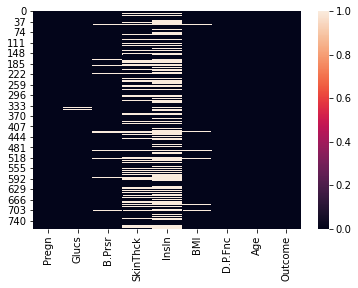

In [94]:
sns.heatmap(data.isnull())

In [95]:
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    
# Plotting 
missing_plot(data, 'Outcome')

### Miissing value Manupulation in Insulation category

In [96]:
data.groupby('Outcome').agg(['median','mean'])

Glucs             B.Prsr            SkinThck             Insln  \
        median        mean median       mean   median       mean median   
Outcome                                                                   
0        107.0  110.643863   70.0  70.877339     27.0  27.235457  102.5   
1        140.0  142.319549   74.5  75.321429     32.0  33.000000  169.5   

                       BMI            D.P.Fnc              Age             
               mean median       mean  median      mean median       mean  
Outcome                                                                    
0        130.287879   30.1  30.859674   0.336  0.429734     27  31.190000  
1        206.846154   34.3  35.406767   0.449  0.550500     36  37.067164

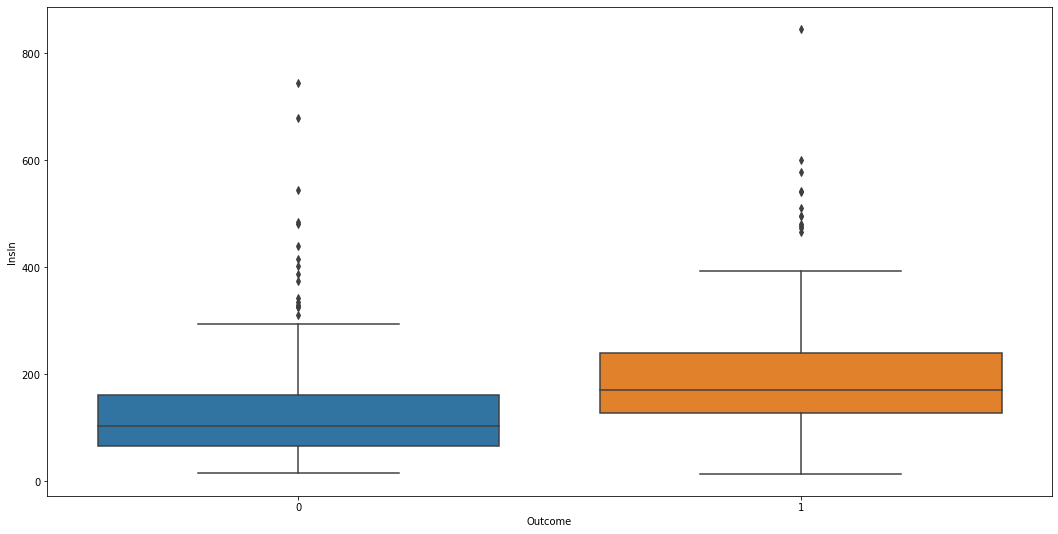

In [97]:

plt.figure(figsize=(18,9))  #to manipulate the size
sns.boxplot(x='Outcome',y='Insln',data=data)

### from the figure we saw highest % miisng value in Insulation,followed by skinthickness and Pregnecis


In [98]:
 
def impute_ins(cols):  
    Insln=cols[0]
    Outcome=cols[1]
    
    if pd.isnull(Insln):
        if Outcome==1:
            return 170
        else:
            return 102
        
    else:
        return Insln

In [99]:
data['Insln']=data[['Insln','Outcome']].apply(impute_ins,axis=1)

In [100]:
data.columns

Index(['Pregn', 'Glucs', 'B.Prsr', 'SkinThck', 'Insln', 'BMI', 'D.P.Fnc',
       'Age', 'Outcome'],
      dtype='object')

## Missng value manupulation in Glucose,BMI,B.PRESSURE,PREGNECIES

In [101]:
#Incase of Gluscose,Blood pressure,BMI % of missing value is less,so we will replace null value with median
data['Glucs']=data['Glucs'].fillna(data['Glucs'].mean())
data['B.Prsr']=data['B.Prsr'].fillna(data['B.Prsr'].mean())
data['BMI']=data['BMI'].fillna(data['BMI'].mean())


In [102]:
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    
# Plotting 
missing_plot(data, 'Outcome')

## Missing value Manupulation in Skin Thickness

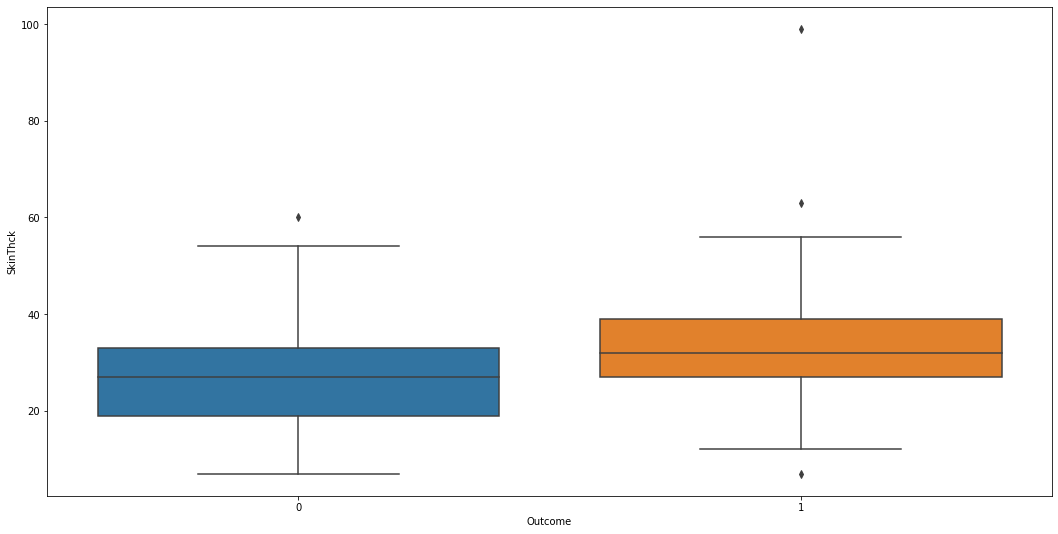

In [103]:


#Next need to fill the missing value in skinthickness

plt.figure(figsize=(18,9))  #to manipulate the size
sns.boxplot(x='Outcome',y='SkinThck',data=data)

In [104]:
 
def impute_thick(cols):  
    SkinThck=cols[0]
    Outcome=cols[1]
    
    if pd.isnull(SkinThck):
        if Outcome==1:
            return 32
        else:
            return 27
        
    else:
        return SkinThck

In [105]:
data['SkinThck']=data[['SkinThck','Outcome']].apply(impute_ins,axis=1)

In [106]:
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    
# Plotting 
missing_plot(data, 'Outcome')

## Missng Value filled,Incase of Insulatn and Skinthickness,as % of missng value are relevent ,and mean value differ betwn Outcome 0 and 1.So with the help of  function ,miisng value has been filled with mean depending on outcome value .Incase of Pregencies,0 means no pregnency which has meaning,so no need to be manupulated.

## Display of Correlation betwn different features

,Glucs,B.Prsr,SkinThck,Insln,BMI,D.P.Fnc,Age,Outcome
Glucs,1.000000,0.218367,0.158682,0.489316,0.230941,0.137060,0.266534,0.492928
B.Prsr,0.218367,1.000000,0.162941,0.067026,0.281268,-0.002763,0.324595,0.166074
SkinThck,0.158682,0.162941,1.000000,0.015368,0.073812,-0.111067,0.238331,0.288501
Insln,0.489316,0.067026,0.015368,1.000000,0.237322,0.147234,0.123740,0.379312
BMI,0.230941,0.281268,0.073812,0.237322,1.000000,0.153400,0.025519,0.311924
D.P.Fnc,0.137060,-0.002763,-0.111067,0.147234,0.153400,1.000000,0.033561,0.173844
Age,0.266534,0.324595,0.238331,0.123740,0.025519,0.033561,1.000000,0.238356
Outcome,0.492928,0.166074,0.288501,0.379312,0.311924,0.173844,0.238356,1.000000


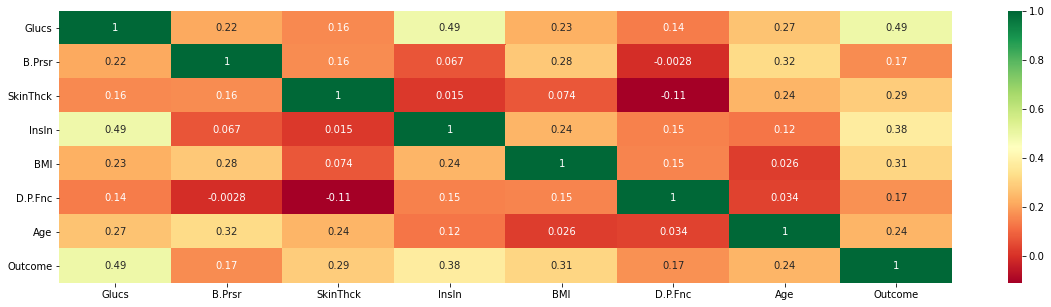

In [107]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,5))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
data.corr()

## Relation between different features

### Mainly features like Age,Blood pressure,pRegnencies,Skinthickness,BMI are interrelated with each others in larger portn


## Distribution of different features,Later we will apply feature scaling to reshape into normal distribution where distribution is left,right skewed before model buidling

In [108]:
data.columns

Index(['Pregn', 'Glucs', 'B.Prsr', 'SkinThck', 'Insln', 'BMI', 'D.P.Fnc',
       'Age', 'Outcome'],
      dtype='object')

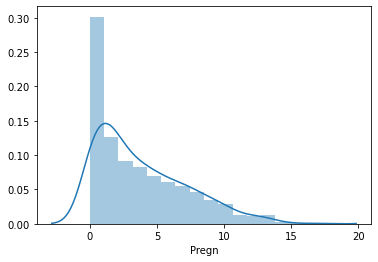

In [109]:
sns.distplot(data['Pregn'])

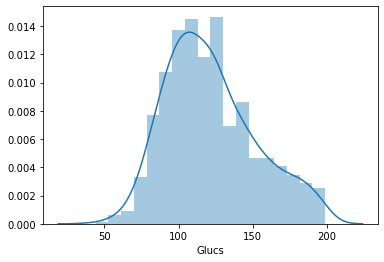

In [110]:
sns.distplot(data['Glucs'])

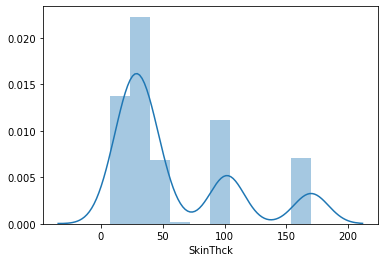

In [111]:
sns.distplot(data['SkinThck'])

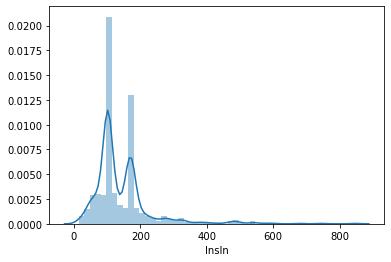

In [112]:
sns.distplot(data['Insln'])

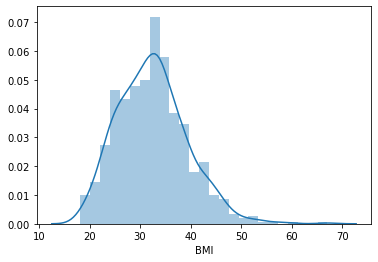

In [113]:
sns.distplot(data['BMI'])

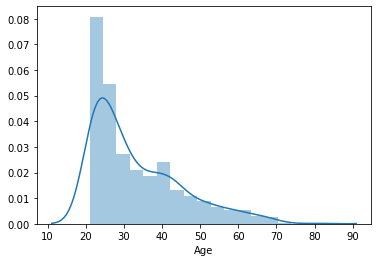

In [114]:
sns.distplot(data['Age'])

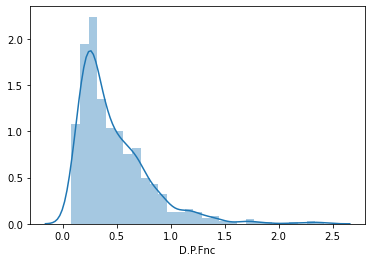

In [115]:
sns.distplot(data['D.P.Fnc'])

In [116]:
data.groupby('Outcome').agg(['median','mean'])

Glucs             B.Prsr            SkinThck             Insln  \
        median        mean median       mean   median       mean median   
Outcome                                                                   
0        107.5  110.710121   72.0  70.935397     32.0  48.020000  102.0   
1        140.0  142.165573   74.0  75.147324     39.0  77.985075  170.0   

                       BMI            D.P.Fnc              Age             
               mean median       mean  median      mean median       mean  
Outcome                                                                    
0        116.936000  30.40  30.888434   0.336  0.429734     27  31.190000  
1        187.873134  34.25  35.384757   0.449  0.550500     36  37.067164

In [121]:
#From above data we observe that 'Pregnancies' is object type,so we need to convert in into integer type
data['Pregn']=data['Pregn'].astype(str).astype('int64')

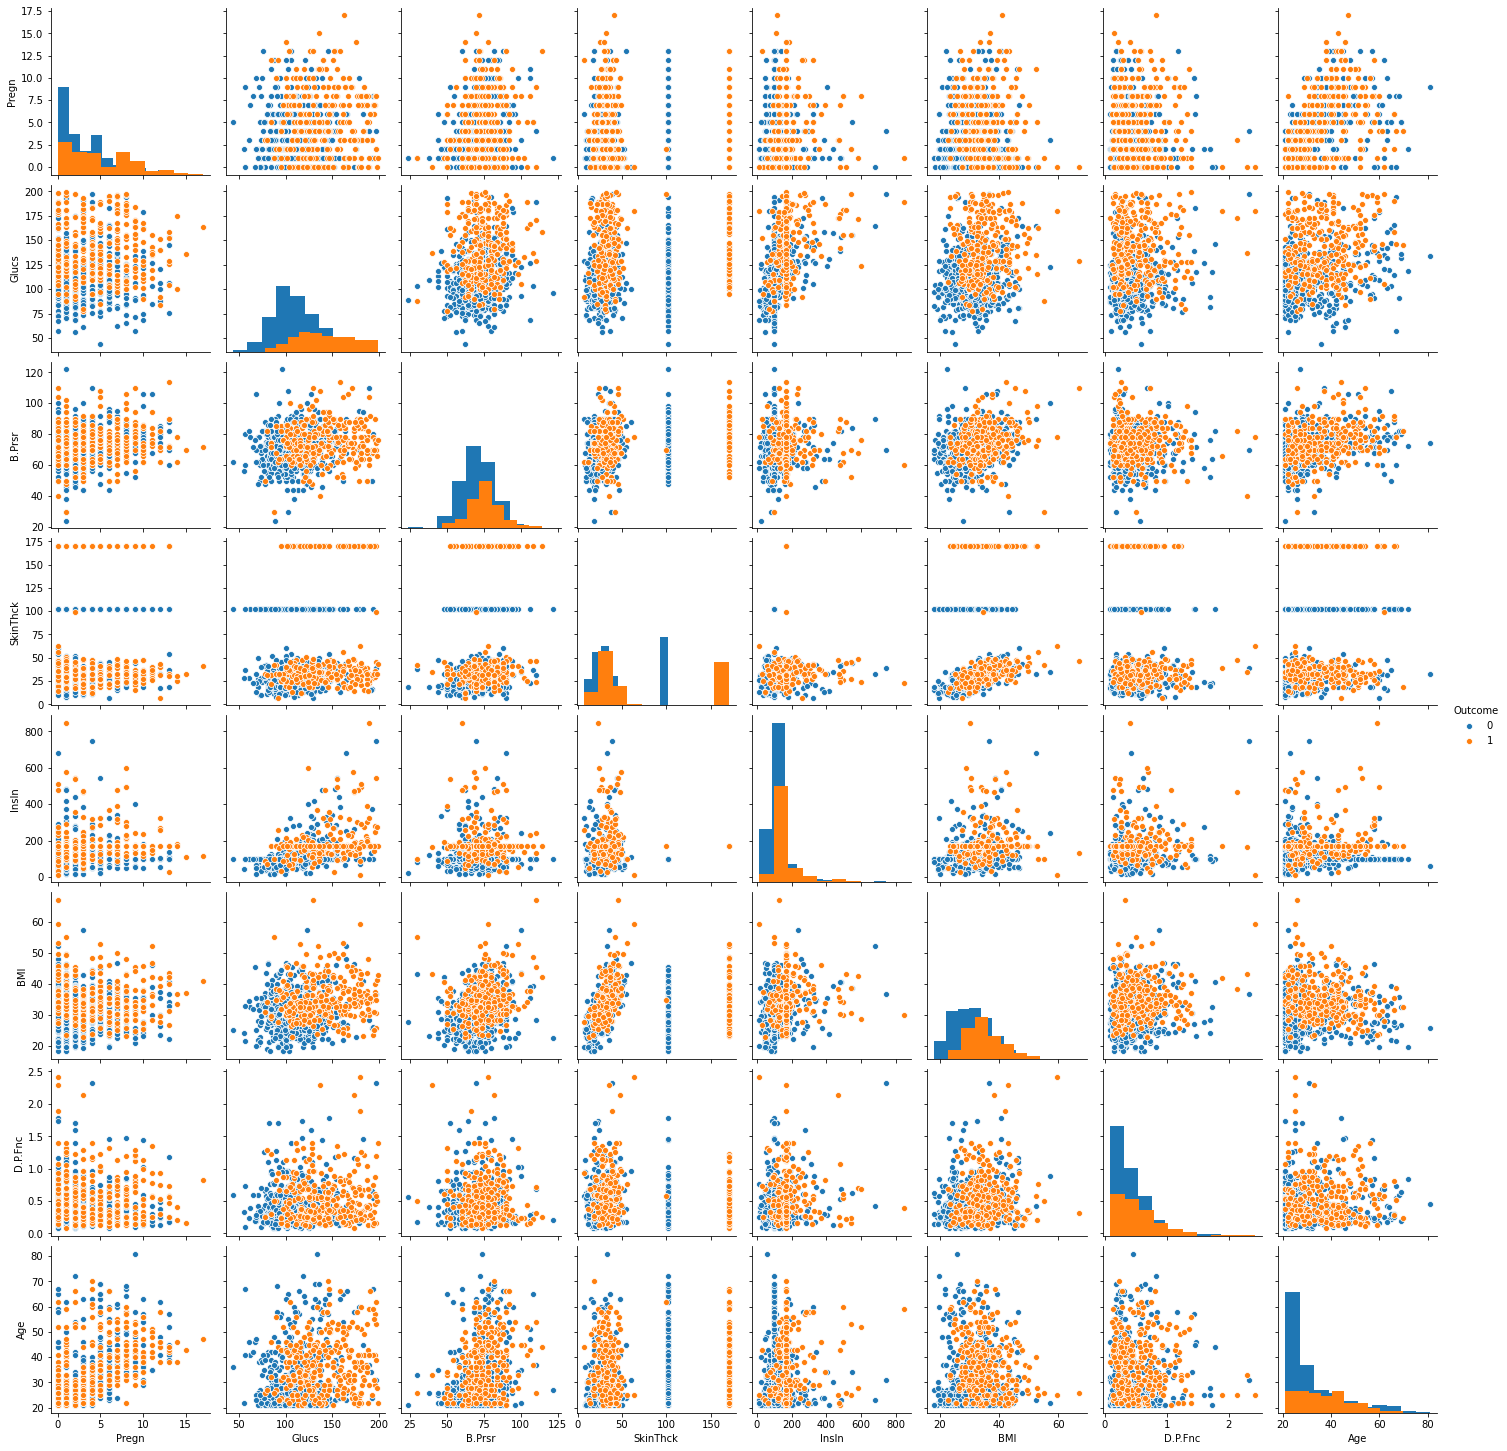

In [123]:
sns.pairplot(data,hue='Outcome',diag_kind='hist');

## Conclusion from pair plot we can visual relation betwn all features in data,whre blue color indicate having no daibetes ,and other color indicate daibetes.Exmple-Skinthickness and BMI corelate with eachother linearly

In [124]:
data.columns


Index(['Pregn', 'Glucs', 'B.Prsr', 'SkinThck', 'Insln', 'BMI', 'D.P.Fnc',
       'Age', 'Outcome'],
      dtype='object')

# Glucose Vs BMI VS Outcome


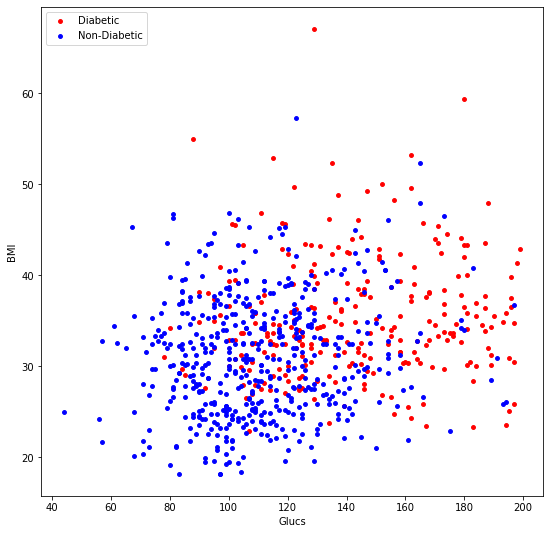

In [125]:
plt.figure(figsize=(9,9))
m=data['Outcome']==1
n=data['Outcome']==0

plt.scatter(data.loc[m,'Glucs'],data.loc[m,'BMI'],c='r',s=15,label='Diabetic')
plt.scatter(data.loc[n,'Glucs'],data.loc[n,'BMI'],c='b',s=15,label='Non-Diabetic')
plt.xlabel('Glucs')
plt.ylabel('BMI')
plt.legend(loc=2);#TO GIVE LEGEND

# Conclusion-We can observe that if BMI  is within 32 to 40 and Glucose value is over 160 then posibility to be daibetic is high

# AGE VS BLOOD PRESSURE VS OUTCOME

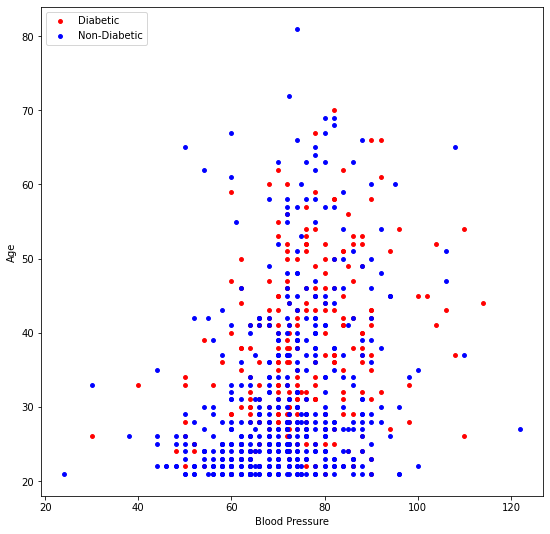

In [126]:
plt.figure(figsize=(9,9))
m=data['Outcome']==1
n=data['Outcome']==0

plt.scatter(data.loc[m,'B.Prsr'],data.loc[m,'Age'],c='r',s=15,label='Diabetic')
plt.scatter(data.loc[n,'B.Prsr'],data.loc[n,'Age'],c='b',s=15,label='Non-Diabetic')
plt.xlabel('Blood Pressure')
plt.ylabel('Age')
plt.legend(loc=2);#TO GIVE LEGEND

###  Conclusion-(1).The person whose Age is within 27 and blood Pressure is 50 to 90,being daibetic is very very less,almost zero.(2)The person with age Over 30 and Blood Pressure over 70 tends to be daibetics

# Spliting data set into dependent & independent & aslo in Train-Test 

In [127]:
data.head()

,Pregn,Glucs,B.Prsr,SkinThck,Insln,BMI,D.P.Fnc,Age,Outcome
0,6,148.0,72.0,35.0,170.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.0,26.6,0.351,31,0
2,8,183.0,64.0,170.0,170.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [128]:
X=data.iloc[:,0:8].values#iNDEPENDENT
Y=data.iloc[:,-1].values.reshape(-1,1)#DEPENDENT

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [130]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(576, 8)
(192, 8)
(576, 1)
(192, 1)


# Feature Scaling

In [131]:
#to make normal distribution 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 0:8] = sc.fit_transform(X_train[:, 0:8])
X_test[:,0:8] = sc.transform(X_test[:,0:8])
print(X_train)
print(X_test)

[[ 2.80346794  0.24235989  0.01112665 ...  1.10297267  0.29608546
   0.96352088]
 [ 0.07832678  0.24235989  1.13577091 ...  0.40453235 -0.70087555
  -0.86295593]
 [-0.22446668 -2.02020774  0.80486705 ...  0.30267647 -0.66548048
   1.13747105]
 ...
 [ 1.89508755 -0.6892856   1.13577091 ...  1.93237054  1.96850229
   0.44167036]
 [-1.13284707  0.64163653  0.01112665 ...  1.46674367 -0.77756486
  -0.34110542]
 [-1.13284707  0.10926768  1.96303057 ... -1.42887348 -0.6094383
  -1.03690611]]
[[ 0.6839137  -0.78910477 -1.18055612 ...  0.24447311 -0.11390738
   0.87654579]
 [-0.52726014 -0.32328202  0.22578529 ...  0.49183739 -0.94569142
  -1.03690611]
 [-0.52726014 -0.45637423 -0.68420033 ... -0.22115377 -0.91619553
  -1.03690611]
 ...
 [ 0.6839137   0.04272157 -0.0223926  ...  0.18626975  0.77981801
   0.09377001]
 [-0.22446668 -1.45456583 -1.84236384 ... -0.19205209 -0.65073254
  -0.60203068]
 [-0.22446668 -0.52292034 -0.0223926  ... -0.94869576 -0.77166568
  -0.51505559]]


# Model Training

# LOGISTICS REGRESSION

In [132]:
from sklearn.model_selection import cross_val_score
def classify(model,X,y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    model.fit(X_train,Y_train)
    print('Accuracy is',model.score(X_test,Y_test)*100)
    #Cross validation used for bettr validation of model
    score=cross_val_score(model,X,Y, cv=5)
    print('Cross validation is',np.mean(score)*100)

In [133]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model,X,Y)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_m

Accuracy is 80.72916666666666


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

Cross validation is 80.99482217129277


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

In [134]:
#In Logisctics regression-Accuracy is approx 81% and Cross validation is approx 81

# DECISSION TREE

In [136]:
#Decision Tree
#Accuracy and crossvalidation are respctviely 65% and 68%
#we will apply another model
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,X,Y)


Accuracy is 80.72916666666666
Cross validation is 87.11314828961886


In [137]:
# In Decission Tree Model
# Accuracy is 80.72
# Cross validation is 87.11

# RANDOM FOREST

In [138]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, Y_train.ravel())

RandomForestClassifier(random_state=10)

In [139]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(Y_test, predict_train_data)))

Accuracy = 0.865


# ENSEMBLE TECHNIQUE

In [140]:

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [141]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [142]:

classifier=xgboost.XGBClassifier()

In [143]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [144]:
 def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [145]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



 Time taken: 0 hours 0 minutes and 6.59 seconds.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.4s finished


In [146]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [147]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [148]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,Y.ravel(),cv=10)

[21:28:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:28:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:28:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [149]:
score

array([0.90909091, 0.88311688, 0.83116883, 0.87012987, 0.84415584,
       0.92207792, 0.90909091, 0.90909091, 0.93421053, 0.88157895])

In [150]:
score.mean()

0.8893711551606289

# Best fitted Model,Score mean is 89